
📊 BÁO CÁO THỐNG KÊ DỮ LIỆU (1141 mẫu)
NHÃN (LABEL)    | SỐ LƯỢNG   | TỶ LỆ %   
----------------------------------------
ANG             | 210        | 18.4%
ANX             | 161        | 14.1%
HAP             | 159        | 13.9%
NEU             | 468        | 41.0%
SAD             | 143        | 12.5%
----------------------------------------


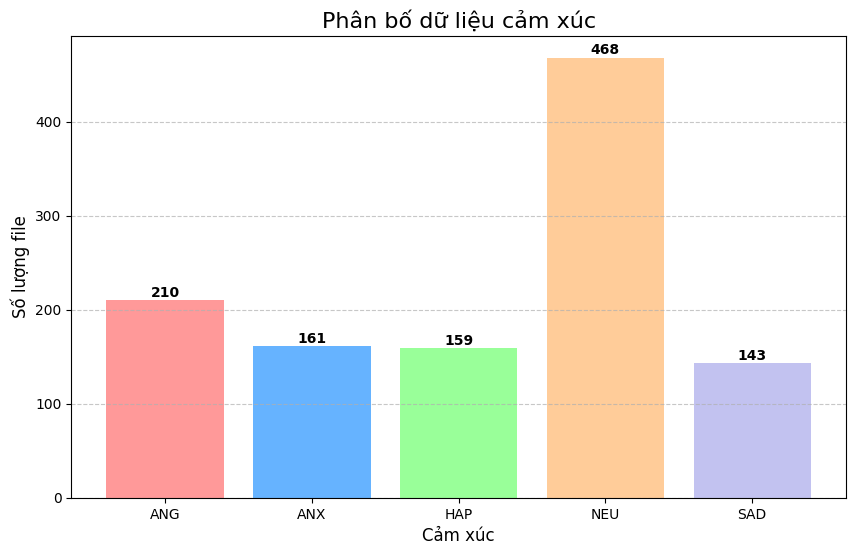

 Đã vẽ biểu đồ phân bố.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ===== CẤU HÌNH =====
project_root = os.path.dirname(os.getcwd())
preproc_dir = os.path.join(project_root, "pre_processing")
X_path = os.path.join(preproc_dir, "X_data.npy")
y_path = os.path.join(preproc_dir, "y_data.npy")

# ===== XỬ LÝ =====


# 1. Load dữ liệu
y_onehot = np.load(y_path)
classes = np.load(os.path.join(preproc_dir, "classes.npy"))

# 2. Giải mã One-hot về dạng số nguyên (Index)
# Ví dụ: [0, 0, 1, 0, 0] -> Index 2
y_indices = np.argmax(y_onehot, axis=1)

# 3. Đếm số lượng
unique, counts = np.unique(y_indices, return_counts=True)
stats = dict(zip(unique, counts))

total_samples = len(y_indices)

# ===== IN KẾT QUẢ =====
print("\n" + "="*40)
print(f"📊 BÁO CÁO THỐNG KÊ DỮ LIỆU ({total_samples} mẫu)")
print("="*40)
print(f"{'NHÃN (LABEL)':<15} | {'SỐ LƯỢNG':<10} | {'TỶ LỆ %':<10}")
print("-" * 40)

counts_list = [] # Để vẽ biểu đồ

for i, class_name in enumerate(classes):
    count = stats.get(i, 0) # Lấy số lượng, nếu không có thì bằng 0
    percent = (count / total_samples) * 100
    counts_list.append(count)
    
    print(f"{class_name:<15} | {count:<10} | {percent:.1f}%")

print("-" * 40)

# ===== VẼ BIỂU ĐỒ (Nếu chạy trên máy tính có màn hình) =====
try:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(classes, counts_list, color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])
    
    # Viết số lên đầu cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontweight='bold')

    plt.title('Phân bố dữ liệu cảm xúc', fontsize=16)
    plt.xlabel('Cảm xúc', fontsize=12)
    plt.ylabel('Số lượng file', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    print(" Đã vẽ biểu đồ phân bố.")
except Exception as e:
    print(" Không thể vẽ biểu đồ (có thể do môi trường dòng lệnh).")

In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
# import os
# import sys

# # Tắt log rác của Tensorflow
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# # ===== 1. LOAD DỮ LIỆU =====
# print("⏳ Đang load dữ liệu...")

# # Xác định đường dẫn đúng tới thư mục pre_processing (nằm cạnh TrainModel)
# project_root = os.path.dirname(os.getcwd())
# preproc_dir = os.path.join(project_root, "pre_processing")
# X_path = os.path.join(preproc_dir, "X_data.npy")
# y_path = os.path.join(preproc_dir, "y_data.npy")
# classes_path = os.path.join(preproc_dir, "classes.npy")

# missing = [p for p in [X_path, y_path, classes_path] if not os.path.exists(p)]
# if missing:
#     print("❌ LỖI: Không tìm thấy các file .npy sau:")
#     for p in missing:
#         print(f" - {p}")
#     print("👉 Hãy đảm bảo notebook đang chạy từ thư mục TrainModel, và thư mục pre_processing nằm ở cùng cấp với TrainModel.")
#     raise SystemExit(1)

# # Load dữ liệu
# X = np.load(X_path)
# y = np.load(y_path)
# classes = np.load(classes_path)

# print(f"✅ Dữ liệu input: {X.shape}")  # (88, 130, 13)
# print(f"✅ Số lớp cảm xúc: {len(classes)} {classes}")

# # Chia tập Train (80%) và Test (20%)
# # Vì dữ liệu ít (88 mẫu), ta để test_size nhỏ thôi để dành dữ liệu cho máy học
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ===== 2. THIẾT KẾ MODEL (CNN 1D) =====
# input_shape = (X.shape[1], X.shape[2])  # (130, 13)
# num_classes = y.shape[1]

# model = Sequential()

# # Block 1
# model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))

# # Block 2
# model.add(Conv1D(128, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))

# # Block 3
# model.add(Conv1D(64, kernel_size=3, activation='relu'))  # Giảm filter chút vì data ít
# model.add(MaxPooling1D(pool_size=2))

# model.add(Flatten())

# # Fully Connected
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  # Dropout giúp giảm học vẹt
# model.add(Dense(num_classes, activation='softmax'))  # Output layer

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # ===== 3. TRAINING =====
# print("\n🚀 BẮT ĐẦU TRAIN...")
# # Batch size nhỏ (8 hoặc 16) vì tổng dữ liệu chỉ có 88 mẫu
# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     batch_size=32,
#                     validation_data=(X_test, y_test),
#                     verbose=1)

# # ===== 4. ĐÁNH GIÁ =====
# print("\n📊 ĐÁNH GIÁ KẾT QUẢ TRÊN TẬP TEST:")
# loss, acc = model.evaluate(X_test, y_test, verbose=0)
# print(f"🎯 Độ chính xác (Accuracy): {acc*100:.2f}%")

# # Báo cáo chi tiết
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)

# print("\n--- CHI TIẾT TỪNG LỚP ---")
# print(classification_report(y_true, y_pred_classes, target_names=classes))

# # ===== 5. LƯU MODEL =====
# model_name = "emotion_model.keras"  # Đuôi mới của Keras là .keras (thay vì .h5)
# model.save(model_name)
# print(f"\n💾 Đã lưu model tại: {model_name}")
# print("👉 Bây giờ bạn có thể dùng file này để dự đoán cảm xúc!")

⏳ Đang load dữ liệu...
✅ Dữ liệu input: (977, 130, 13)
✅ Số lớp cảm xúc: 5 ['ANG' 'ANX' 'HAP' 'NEU' 'SAD']

🚀 BẮT ĐẦU TRAIN...


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3598 - loss: 1.7968 - val_accuracy: 0.3980 - val_loss: 2.4102
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5480 - loss: 1.1908 - val_accuracy: 0.4031 - val_loss: 1.8159
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6005 - loss: 1.0140 - val_accuracy: 0.4592 - val_loss: 1.4871
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7004 - loss: 0.8248 - val_accuracy: 0.4643 - val_loss: 1.5571
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7490 - loss: 0.6854 - val_accuracy: 0.4694 - val_loss: 1.5080
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7887 - loss: 0.5676 - val_accuracy: 0.4898 - val_loss: 1.4322
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8604 - loss: 0.4551 - val_accuracy: 0.5000 - val_loss: 1.6604
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8899 - loss: 0.3477 - val_accuracy: 0.4949 - val_los

In [ ]:
# import numpy as np
# import librosa
# import tensorflow as tf
# import os

# # ===== CẤU HÌNH =====
# # Đường dẫn đến file audio bạn muốn thử
# # Bạn có thể đổi tên file này thành file bất kỳ bạn muốn test
# TEST_FILE = r"E:\KHMT\N4K2\DATN\data\raw_cuts_with_time_VNDC\0h01m55s_seg0022.wav" 

# MODEL_PATH = "emotion_model.keras"
# # Đảm bảo load đúng 'classes.npy' từ thư mục pre_processing (cùng cấp với TrainModel)
# project_root = os.path.dirname(os.getcwd())
# CLASSES_PATH = os.path.join(project_root, "pre_processing", "classes.npy")

# SAMPLE_RATE = 22050
# DURATION = 3
# SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

# # ===== HÀM XỬ LÝ (Phải giống hệt lúc train) =====
# def extract_mfcc(file_path):
#     try:
#         signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
#         if len(signal) > SAMPLES_PER_TRACK:
#             signal = signal[:SAMPLES_PER_TRACK]
#         else:
#             padding = int(SAMPLES_PER_TRACK - len(signal))
#             signal = np.pad(signal, (0, padding), mode='constant')
#         mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)
#         return mfcc.T
#     except Exception as e:
#         print(f"Lỗi đọc file: {e}")
#         return None

# # ===== CHƯƠNG TRÌNH DỰ ĐOÁN =====
# # 1. Load Model và Nhãn
# print("⏳ Đang load model...")
# model = tf.keras.models.load_model(MODEL_PATH)
# classes = np.load(CLASSES_PATH)
# print(f"✅ Đã load model. Các nhãn AI biết: {classes}")

# # 2. Xử lý file âm thanh
# print(f"🎧 Đang nghe file: {os.path.basename(TEST_FILE)}")
# mfcc = extract_mfcc(TEST_FILE)

# if mfcc is not None:
#     # Model cần input dạng (Số lượng, Thời gian, Đặc trưng) -> (1, 130, 13)
#     mfcc = np.expand_dims(mfcc, axis=0) 

#     # 3. Dự đoán
#     prediction = model.predict(mfcc)
#     predicted_index = np.argmax(prediction)
#     predicted_label = classes[predicted_index]
#     confidence = np.max(prediction) * 100 # Độ tin cậy

#     print("\n" + "="*30)
#     print(f"🤖 KẾT QUẢ DỰ ĐOÁN: {predicted_label}")
#     print(f"🎯 Độ tin cậy: {confidence:.2f}%")
#     print("="*30)
    
#     # In ra xác suất của từng nhãn
#     print("\nChi tiết xác suất:")
#     for i, label in enumerate(classes):
#         print(f"- {label}: {prediction[0][i]*100:.2f}%")

# else:
#     print("❌ Không xử lý được file âm thanh.")